## Support Vector Machines - SVM
Support Vector Machines (SVM) is one of the most popular basic algorithms for classification. It is based on an assumption that in a multi-dimensional space there exists a space that separates the classes. This hyperplane will try to separate classes in an optimal way - in such a way that the distance between this hyper plane and observations from both classes is equal and maximized.

To put is in other words we want to have a line (hyperplane) that runs as perfectly in the middle between groups (classes) as possible. The meaning of "in the middle" is perfectly illustrated below.

<img src="img/svm_MA.png">
Source: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

It is clear that in the left figure the separating line makes a "worse" division. Some observations are really close to the line. With slightly different random draws the risk of miss-classification is greater.

<img src="img/svm_MB.png">
Source: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Lets see how this separation problem looks like formally. We are looking for a vector $\beta$, so that the distance to the closest observation is maximized.

$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1$$

In the equation above in optimization constraints there is inequality sign. This means that we only take into consideration the observations that are "the closest". When the observation is already properly classified (far from the decision hyperplane) we do not include it in the loss function. As a result only the distance to few observations is taken into account.

<img src="img/svm_hyper_log.png">
Source: Elements of Statistical learning. In the figure red line represents SVM separation and blue line is a result of logistic regression classification.


### Inexistence of full separability.
In most cases it is impossible to fully separate two groups with a hyperplane. In this case we can calculate how far those missclassified observations are "over the line" ($\xi_i$). We will reformualte the optimization problem as follows:
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

This extensions is illustrated below:
<img src="img/svm_nonsep.png">
Source: Elements of Statistical learning

### Penalty for errors
We include parameter C that determines the strenthg with which we want to penalize those errors.
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

Example of effect of the size of C on the hyperplane in a fully separable probem:
<img src="img/svm_DiffC.png">
Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Own compilation. Code to generate samples et the end of the notebook.

Example of effect of the size of C on the hyperplane in a non separable probem:
<img src="img/svm_DiffC1.png">
Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Own compilation. Code to generate samples et the end of the notebook.

### Support vectors
In a fully separable scenario the observations for which we maximize the distance to the separation hyperplane are called support vectors. Each observation is a multidimensional vector. As we build the hyperplane based on those vectors we can say that the plane is supported by them. Hence the name support vector machine.

### Nonlinearity
In practice limiting yourself to a linear hyperplane usually does not allow us to achieve good separation and therefore classification efficiency.

<img src="img/svm_ME.png">
Source: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

One solution to this problem is feature engineering. We can manualy generate new variables, for example by using polynominals in such a simple way $(x+y)^2 = x^2+2xy+y^2$. This way we transform a two dimensional problem into a three dimensional space. In this case it allows us to achieve great results.
<img src="img/svm_MF.gif">
<img src="img/svm_MG.png">
Source: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Other examples of non linear transformation of input space:
<img src="img/svm_mapping1.png" width="40%"><img src="img/svm_mapping2.png" width="40%"><img src="img/svm_mapping3.jpg" width="40%">

Usually we do not want to relay on manual transformations. On one hand it is time consuming and on the other error-prone. This is why we use kernel transformations.

### Kernels
When we look at the definition of SVM optimization problem we see that it is easy to reformulate this problem, so that we will be able to capture non linear relationships. Instead of using $x_i$ we can use any transformation of it $h(x_i)$. For our optimization problem it makes very little difference how many independent variables there are as long as the number of observations stays the same.

$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i h(x_i)\geq 1-\xi_i$$
For which the solution is:
$$\hat \beta = \sum_{i=0}^{N}\hat\alpha y_i x_i$$
$$f(x) = h(x)^T\beta+\beta_0 = \sum_{i=0}^{N}\alpha y_i \left \langle h(x),h(x_i) \right \rangle + \beta_0$$
only for those $i$ that are in the decision boundry (that are not classified good enough).

The function $h(x)$ can be almost enythin. We will call this transformation a kernel (https://en.wikipedia.org/wiki/Kernel_method) K.
$$K(x, x') =  \left \langle h(x),h(x') \right \rangle$$

Kernels are fot products between one observation and all observations in the training set. We can interpret kernels as functions that measure similarity. It is called a kernel trick because we do not compute a new dataset with all features in new high dimensional space but rather just look at the results of the dot product. Therefore we have the advantage of high dimensionality with reduced computational burden.

The mose popular kernels are polynominal
$$K(x, x') = (1 + \left \langle h(x),h(x') \right \rangle)^d$$
and radial  (RBF - radial Basis Function)
$$K(x, x') = \exp(−\gamma \left \| x-x' \right \|^2 )$$


### SVM - extensions
In the basic version SVM is suitable only for binary classification problems. In practice it is easy to extend it to multinominal classification problems and even regression problems.

To apply binary calssification to multinominal problems we usually use one of two approaches:
* One vs All (OvA) also known as One vs Rest (OvR). In this case for $K$ classes we run $K$ classifiers. In each case we assume that observations from one class are "1" and observations from all other classes are "0". Next when we make a prediction we run all K classificators. It is possible that there wil be a "tie" when two or more classificators predict "1". In such a case we need to relay on probabilities or random assignment.
* One vs One (OvO). In this approach we conctruct $K(K-2)/2$ classifieres. Each one is trained on a subsample of observations that contains only data for two classes. Next we make a decision about our final prediction based on voting of classifiers. Just like in OvA "tie" is a possibility.

### SVM - summary
Advantages:
* it is very efficient when groups are fully or almost fully separable.
* can work very well when we have more independent variables than observations.
* can be adjusted to work well with unbalanced datasets.
* very little hyper parameters to tune.
* resiliant to overfitting to a degree
* it is partialy immune to outliers

Disatvantages:
* Very slow for large number of observations.
* Not the most efficient when separability is low.
* Does nto allow for inference.

## SMV - excercises
First lets import all the libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc

/home/wilam/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
medical = pd.read_pickle("datasets/medical.p")
print(medical.UCURNINS.unique())
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)
print(medical.UCURNINS.unique())
features = ["UMARSTAT", "USATMED", "URELATE", "REGION", "FHOSP", "FDENT", "FEMER", "FDOCT", "UIMMSTAT", "UAGE", "U_FTPT", "U_WKSLY", "U_USHRS", "HOTHVAL", "HRETVAL", "HSSVAL", "HWSVAL", "UBRACE", "UEDUC3", "GENDER"]
levCols = []
numCols = []
for col in features:
    if medical[col].dtype==object:
        levCols.append(col)
    else:
        numCols.append(col)

# Binaryzacja zmiennych nominalnych
dummLev = pd.get_dummies(medical[levCols], drop_first=True)
dummLev.shape
medical2 = pd.concat([medical[numCols], dummLev], axis=1)

['Yes' 'No']
[1 0]


Just like with k-NN we need to normalize our variables.

In [3]:
medical2[numCols] = medical2[numCols].apply(lambda x: (x-x.mean())/x.std())
features = medical2.columns.tolist()

In [4]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC

Lets start with simple linear kernel. As the time to run SVM increases quadraticly with number of observations we can lmit the number of samples for training. Depending on your machine values from 500 to 2000 are reasonable.

In [5]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, kernel='linear',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


0.8131217295856139
[0.7999840326089609, 0.8223812941196843, 0.7736003726320628, 0.8395082769240639, 0.8301346716432967]
0.7862821867208526
[0.780957804445589, 0.8049579927737047, 0.7451214130982506, 0.8051360277271393, 0.7952376955595792]


Now lets try the plynominal kernel with degree 2. We  can also try 3 to see if it will improve the fit.

In [6]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, degree=2,kernel='poly',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


0.8621888169762506
[0.8672238178906488, 0.8676055914560422, 0.8586787398543518, 0.8527491658203975, 0.8646867698598131]
0.7715375353514207
[0.7742268218856605, 0.7757323774727395, 0.7703785519844009, 0.7750998361803462, 0.7622500892339564]


Lastly lets run the RBF kernel.

In [7]:
limit = 2000
kf = KFold(n_splits=5)
aucs = []
aucsT = []
clf = SVC(C=1, cache_size=500, degree=3,kernel='rbf',
    max_iter=-1, probability=True,
    tol=0.001, verbose=False)

for train, test in kf.split(medical2.index.values):
    X = medical2.iloc[train].sample(limit)
    clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
    prob = clf.predict_proba(medical2.iloc[test][features].values)
    aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))
    
    prob = clf.predict_proba(X[features].values)
    aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
print(np.mean(aucsT))
print(aucsT)
print(np.mean(aucs))
print(aucs)


0.892485432619195
[0.9149015967867312, 0.8877266653941592, 0.8813887476940825, 0.9002149525757108, 0.8781952006452913]
0.7936699529796256
[0.7903880112128132, 0.8097370989851346, 0.786969427465028, 0.7840635619629055, 0.7971916652722468]


RBF seem to get the best results. Lets see hwo the value of C will affect the result.

In [8]:
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]:
    print(c)
    limit = 2000
    kf = KFold(n_splits=5)
    aucs = []
    aucsT = []
    clf = SVC(C=c, cache_size=500, degree=3,kernel='rbf',
        max_iter=-1, probability=True,
        tol=0.01, verbose=False)

    for train, test in kf.split(medical2.index.values):
        X = medical2.iloc[train].sample(limit)
        clf.fit(X[features].values, medical.iloc[X.index.values]["UCURNINS"].values)
        prob = clf.predict_proba(medical2.iloc[test][features].values)
        aucs.append(metrics.roc_auc_score(medical.iloc[test]["UCURNINS"].values, prob[:,1]))

        prob = clf.predict_proba(X[features].values)
        aucsT.append(metrics.roc_auc_score(medical.iloc[X.index.values]["UCURNINS"].values, prob[:,1]))
    print(np.mean(aucsT))
    print(aucsT)
    print(np.mean(aucs))
    print(aucs)


0.01
0.87470896908342
[0.8724630926967136, 0.8531919654914307, 0.8827827566718215, 0.8861050920910076, 0.8790019384661265]
0.7996729445880786
[0.8047608511533516, 0.8019998799215308, 0.7857711975692048, 0.7978730897315369, 0.807959704564769]
0.1
0.8916853956489345
[0.8927589635608586, 0.8866315388110073, 0.8977864583333333, 0.8942257352759201, 0.8870242822635526]
0.7901958696199994
[0.7934978620814315, 0.7732851883882771, 0.7940426724232366, 0.7975422502699347, 0.7926113749371175]
0.25
0.8945386766927556
[0.8884029726465619, 0.8969021895403152, 0.8763922991071429, 0.9010895812966352, 0.9099063408731228]
0.7933477967773537
[0.7898496776950984, 0.8087246958236978, 0.784759022369012, 0.79144642730246, 0.7919591606965005]
0.5
0.898322700187675
[0.9004563693557575, 0.8925176131058483, 0.8847237699609678, 0.9128429956455435, 0.9010727528702585]
0.7955215579649171
[0.8014580798087751, 0.811934939731402, 0.7759643007766714, 0.7954366586751708, 0.7928138108325657]
1
0.9035716615178895
[0.898696

## Exercises 7
### Exercise 7.1

Using 5-Fold CV apply the SVM method to predict the value of the variable ‘survived’. 
* Check the results for linear, polynominal (degree 2) and RBF kernels.
* Check how the standarization of variables affects the results.
* Check how pronounced the problem of overfitting is and if you can reduce it by reduction of the number of variables.


### Exercise 7.2
For best type of kernel find optimal values of C.

### Exercise 7.3
Try to optimize your models by selection of the best variables and optimal standarization. 

## Appendix

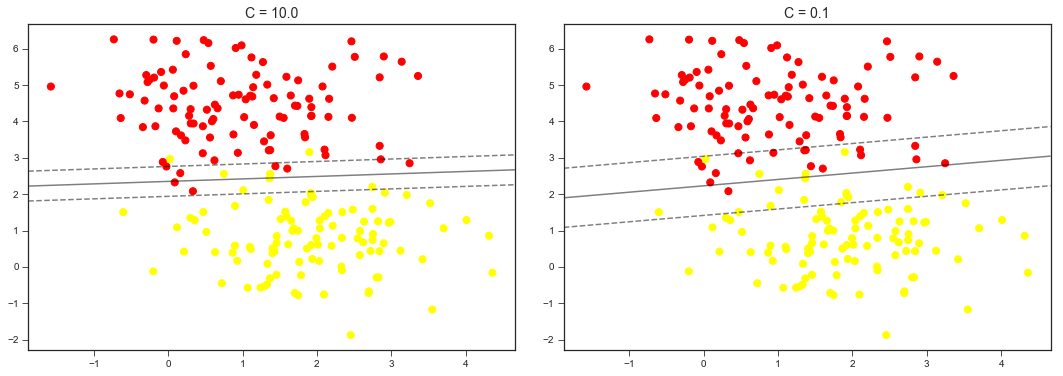

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
# Example from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)